## TRIFEKTUM
#### Beregner for frekvens av forskjellige korreksjoner på S&P 500

#### Desember 2021

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [276]:
d = yf.download("^GSPC", group_by="ticker", period="max")["Adj Close"].reset_index().rename(columns={'Date': 'dato', "Adj Close": "SP500"}).fillna(method="ffill")
d.head()

[*********************100%***********************]  1 of 1 completed


,dato,SP500
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-09,17.500000


In [314]:
df = d

<AxesSubplot:>

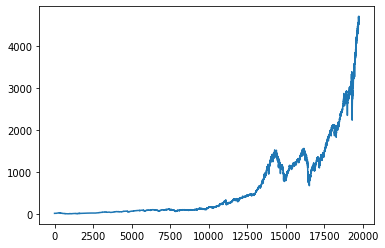

In [278]:
df["SP500"].plot()

In [315]:
window = 100

df["rollmax"] = df["SP500"].rolling(window, min_periods=1).max() #SPY_Dat['SP500'].cummax()
df["Daily_Drawdown"] = df["SP500"]/df["rollmax"] - 1.0

#Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

df["trend"] = np.where(df['Daily_Drawdown'] < 0, "korrigering", np.nan)
df['count'] = df.groupby((df['trend'] != df['trend'].shift(1)).cumsum()).cumcount()
df.loc[df['trend'] != df["trend"].shift(1), 'start'] = df["dato"]
df["start"].ffill(inplace=True)

df = df[df["trend"]=="korrigering"].groupby(["count", "start"])["Daily_Drawdown"].min().reset_index()
df = pd.pivot_table(df, values='Daily_Drawdown', index=["count"], columns=['start'])

df = pd.DataFrame(data=df.min(axis=0), columns=['drawdown'])

labels = ["-50%", "-40%", "-30%", "-20%", "-15%", "-10%"]

df["bin"] = pd.cut(df['drawdown'], 
                  bins=[-1, -.5, -.4, -.3, -.2, -.15, -0.1],
                  labels=labels,
                  )
df = df.dropna()

df.groupby(["bin"]).count()

,drawdown
bin,
-50%,2
-40%,6
-30%,27
-20%,52
-15%,76
-10%,124


<AxesSubplot:xlabel='bin'>

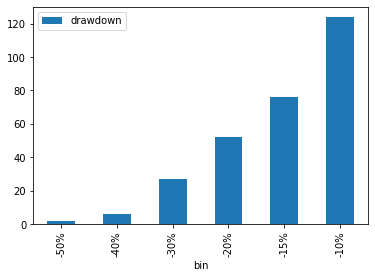

In [325]:
df.groupby(["bin"]).count().plot.bar()